## Assignment 2 - Opsis


In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('mandrill.jpg', cv2.IMREAD_GRAYSCALE).astype(float)

# Define the sigma values
sigmas = [1, 2, 4, 8]

### Exercise 1

Gaussian filtering. Show the result using $\sigma = 1, 2, 4, 8$ and explain in detail what can be seen.

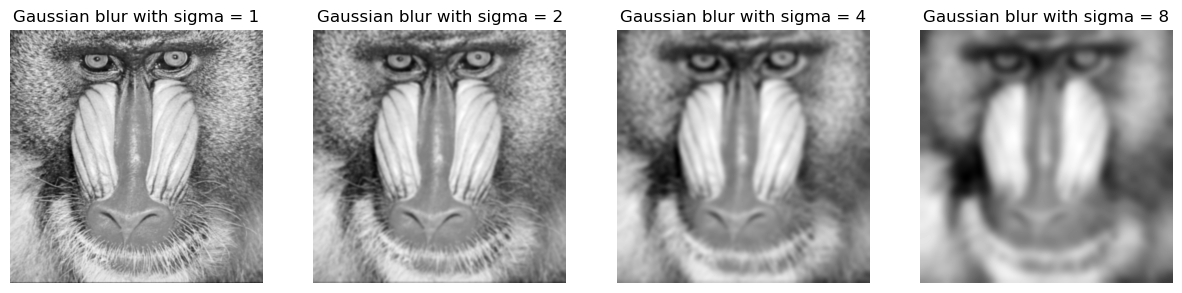

In [ ]:
# Create the plot
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Apply Gaussian blurring for each sigma value
for i, sigma in enumerate(sigmas):

    # Blur the image
    blurred_img = cv2.GaussianBlur(img, (0, 0), sigma)

    # Plot the result
    ax[i].imshow(blurred_img, cmap='gray')
    ax[i].set_title(f'Gaussian blur with sigma = {sigma}')
    ax[i].axis('off')

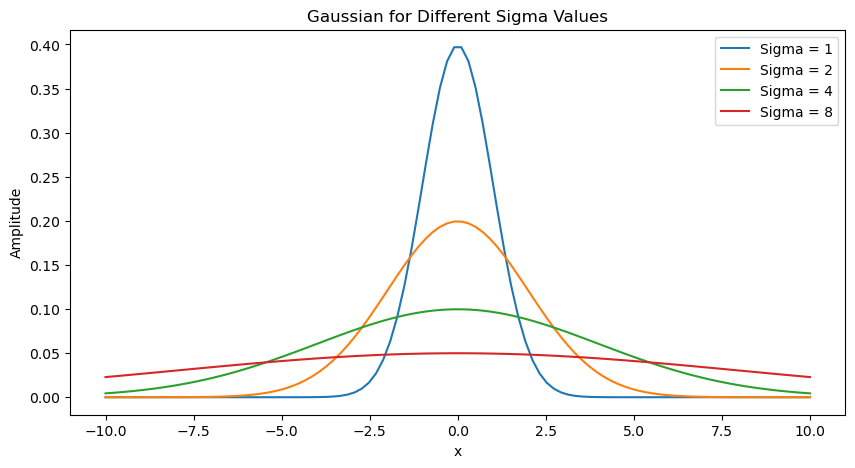

In [ ]:
# Define the necessary parameters
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 5))

# Compute and plot the Gaussian for each sigma 
for sigma in sigmas:
    gaussian = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x/sigma)**2)
    plt.plot(x, gaussian, label=f'Sigma = {sigma}')

plt.legend()
plt.title("Gaussian for Different Sigma Values")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.show()

### Exercise 2 

Gradient magnitude computation using Gaussian derivatives. Use $\sigma =
1, 2, 4, 8$ pixels, and explain in detail what can be seen and how the results
differ.

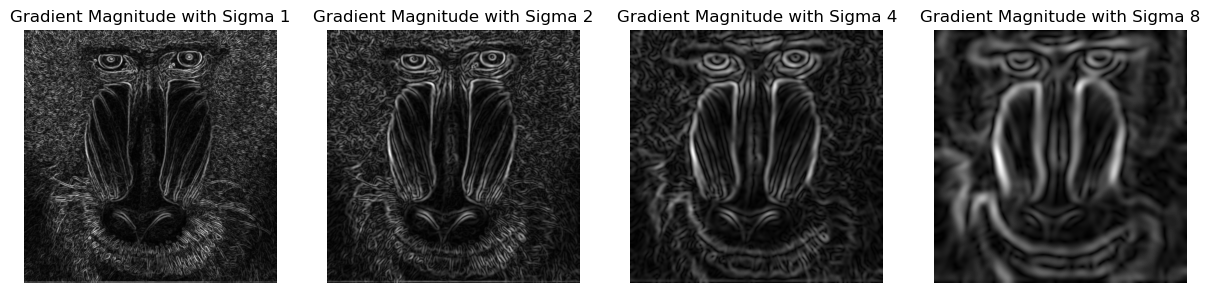

In [ ]:
# Create the plot
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Apply gradient magnitude computation for each sigma value
for i, sigma in enumerate(sigmas):

    # Compute the blurred image
    blurred_img = cv2.GaussianBlur(img, (0, 0), sigma)

    # Compute the gradients with the Sobel filter on the blurred image in both directions
    sobel_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the gradient magnitude
    grad_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Plot the gradient magnitude
    ax[i].imshow(grad_magnitude, cmap='gray')
    ax[i].set_title(f'Gradient Magnitude with Sigma {sigma}')
    ax[i].axis('off')

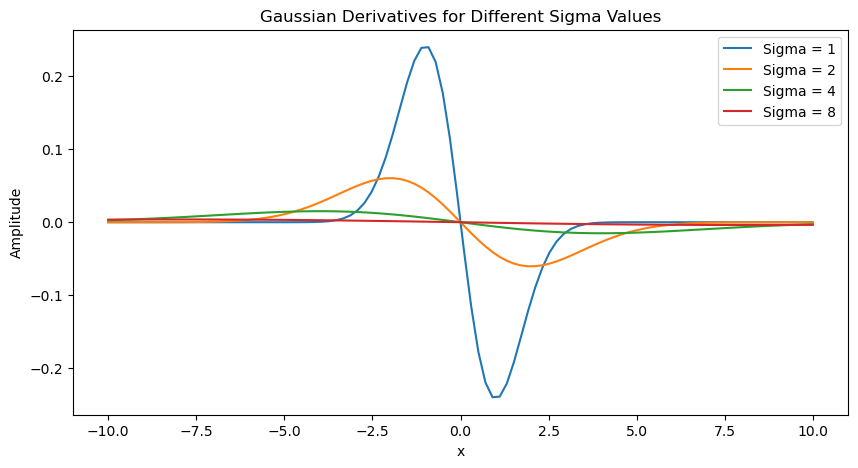

In [7]:
# Define the necessary parameters
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 5))

# Compute and plot the derivative of the Gaussian for each sigma
for sigma in sigmas:
    gaussian_derivative = -(x/(sigma**3 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x/sigma)**2)
    plt.plot(x, gaussian_derivative, label=f'Sigma = {sigma}')

plt.legend()
plt.title("Gaussian Derivatives for Different Sigma Values")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.show()

### Exercise 3

Laplacian-Gaussian filtering. You may implement this as a difference of Gaussians. Again, use $\sigma = 1, 2, 4, 8$  pixels, and explain in detail what can be seen and how the results differ

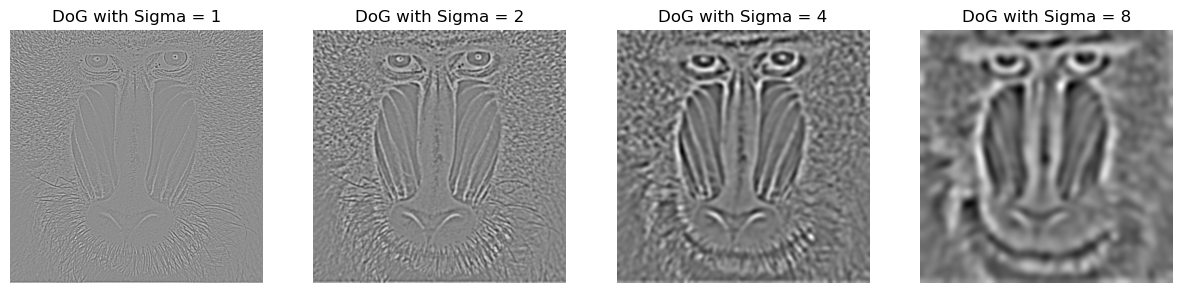

In [ ]:
# Create the plot
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Apply Difference of Gaussian for each sigma value
for i, sigma in enumerate(sigmas):

    # Apply Gaussian blur to the original image with sigma
    blurred_img = cv2.GaussianBlur(img, (0, 0), sigma)

    # Apply Gaussian blur on the image with a larger sigma
    blurred_img_larger = cv2.GaussianBlur(img, (0, 0),  sigma * np.sqrt(2))

    # Compute the Difference of Gaussians
    dog_img = blurred_img_larger - blurred_img

    # Normalize the difference image
    dog_img_norm = (dog_img - dog_img.min()) / (dog_img.max() - dog_img.min() + 1e-12)

    # Plot the DoG result
    ax[i].imshow(dog_img_norm, cmap='gray')
    ax[i].set_title(f'DoG with Sigma = {sigma}')
    ax[i].axis('off')

### Exercise 4

Canny (or similar) edge detection. Describe the parameter values and their
impact on the result. Select what you think is a set of good parameter
values, apply, show and decribe the result.

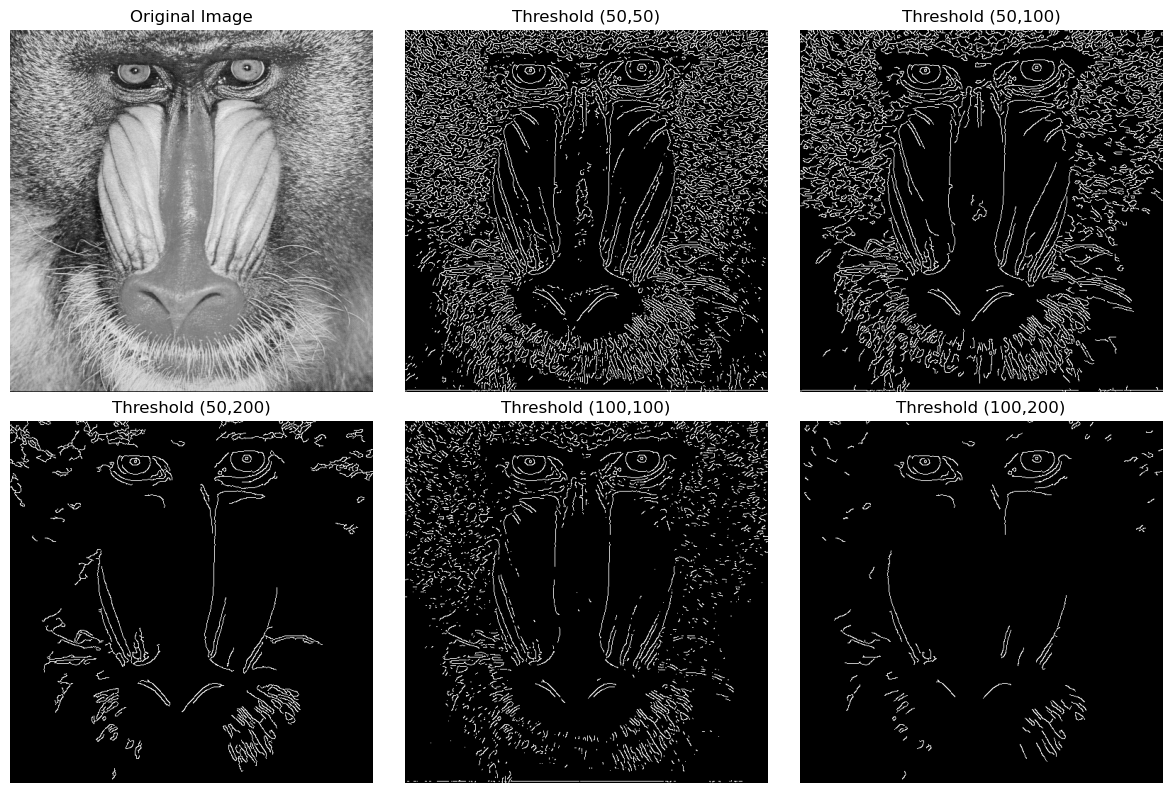

In [9]:
# Define thresholds for edge detection
thresholds = [
(50,50),
(50,100),
(50, 200),
(100, 100),
(100, 200)
]

# Create the plot
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Apply Canny edge detection for each pair of thresholds
for i, (t1, t2) in enumerate(thresholds):

    # Apply Gaussian blur to the original image
    blurred_img = cv2.GaussianBlur(img, (0, 0), 1.5)

    # Detect the edges
    edges = cv2.Canny(np.uint8(blurred_img), t1, t2)

    # Plot the original image and edges
    ax.flat[0].imshow(img, cmap='gray')
    ax.flat[0].set_title(f'Original Image')
    ax.flat[0].axis('off')
    ax.flat[i+1].imshow(edges, cmap='gray')
    ax.flat[i+1].set_title(f'Threshold ({t1},{t2})')
    ax.flat[i+1].axis('off')

plt.tight_layout()
plt.show()
